## The data set is an IMDB data gotten from Kaggle, it contains different information about movies since the year 1980-2020

In [2]:
##Importing needed packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [53]:
## Importing dataset 
df = pd.read_csv(r'C:\Users\user\Desktop\Power Automate\movies.csv')

In [54]:
## Checking the dataset
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [34]:
#getting the statistical summary of the numeric columns of the dataset
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


## Data Cleaning

In [35]:
## Cheking the data types for each columns
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [31]:
## Converting the data type in budget, votes and gross column from float to integer
df["budget"] = df['budget'].astype('int64')

df["votes"] = df['votes'].astype('int64')

df["gross"] = df['gross'].astype('int64')

In [9]:
# Checking for any duplicate in the data set
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7663    False
7664    False
7665    False
7666    False
7667    False
Length: 7668, dtype: bool

In [38]:
##Sorting the data type by gross column
df= df.sort_values('gross', ascending = False)

## Using Matplotlib scatterplot and seaborn regplot to find the correlation between the budget of a movie and the gross income

<function matplotlib.pyplot.show(close=None, block=None)>

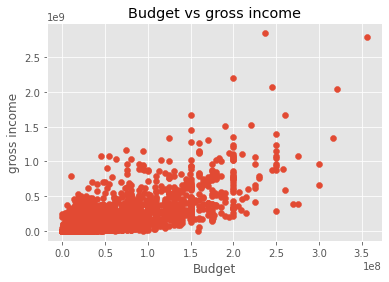

In [71]:
plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget vs gross income')
plt.ylabel('gross income')
plt.xlabel('Budget')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

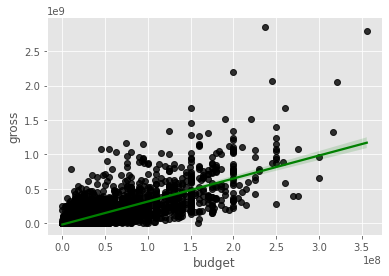

In [64]:
## Checking for correlation between gross income and budget of a movie
sns.regplot(x='budget', y='gross', data = df, scatter_kws={"color":"black"}, line_kws={"color":"green"})
plt.show

#### There is a positive correlation between the budget of a movie and the gross income. 

# Finding the correlation between the numeric features in the table

In [13]:
dfcorr = df.corr()

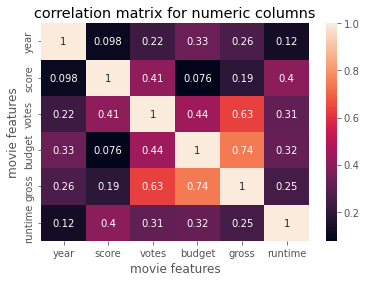

In [16]:
sns.heatmap(dfcorr, annot = True)
plt.title('correlation matrix for numeric columns')
plt.xlabel('movie features')
plt.ylabel('movie features')
plt.show()

#### The deeper the colours are, the less correlated the data's are. Budget and Votes of a movie are highly correlated to the gross income of a movie

## Creating a bar plot if the top 5 genres 

In [7]:
#Displayed dataframe for the most created genres in the dataset.
top_5_genre = df.genre.value_counts().head(5)
print(top_5_genre)

Comedy       2245
Action       1705
Drama        1518
Crime         551
Biography     443
Name: genre, dtype: int64


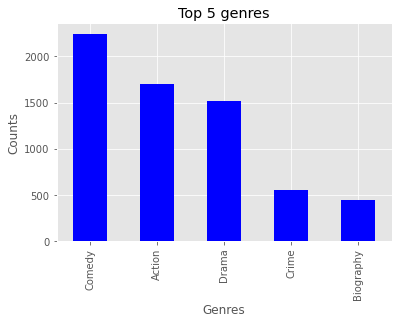

In [55]:
#Visualizing most created gnres in the dataset.
def visual(q_visual):
    plt.title('Top 5 genres')
    plt.xlabel('Genres')
    plt.ylabel('Counts')
visual(df.genre.value_counts().head(5).plot(kind='bar',color='blue'))

#### The genre with the highest count of movies is comedy, followed by action movie, drama, crime and biography respectivley

## Visualizing the top 5 movies according to their gross income

In [70]:
## Creating a list for movie names and gross income of each movie
movies_gross = df[['name', 'gross']]
print(movies_gross)

                                                name        gross
0                                        The Shining   46998772.0
1                                    The Blue Lagoon   58853106.0
2     Star Wars: Episode V - The Empire Strikes Back  538375067.0
3                                          Airplane!   83453539.0
4                                         Caddyshack   39846344.0
...                                              ...          ...
7663                                    More to Life          NaN
7664                                     Dream Round          NaN
7665                                   Saving Mbango          NaN
7666                                    It's Just Us          NaN
7667                                       Tee em el          NaN

[7668 rows x 2 columns]


Text(0, 0.5, 'Gross in billions')

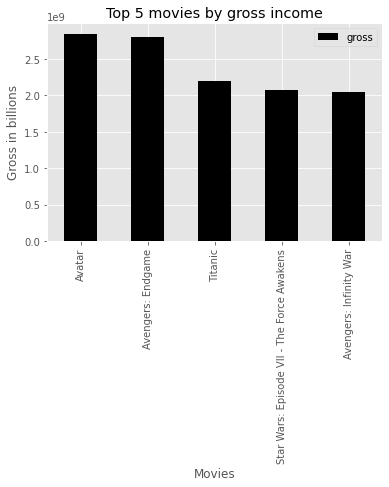

In [78]:
#Getting the top 5 movies by gross income 
visual(movies_gross.nlargest(5, 'gross').plot(x='name', y= 'gross',kind='bar',color='black'))
plt.title('Top 5 movies by gross income')
plt.xlabel('Movies')
plt.ylabel('Gross in billions')

## Visualizing the top 5 movies by Popularity

In [83]:
movies_popularity = df[['votes', 'name']]
print(movies_popularity)

          votes                                            name
0      927000.0                                     The Shining
1       65000.0                                 The Blue Lagoon
2     1200000.0  Star Wars: Episode V - The Empire Strikes Back
3      221000.0                                       Airplane!
4      108000.0                                      Caddyshack
...         ...                                             ...
7663       18.0                                    More to Life
7664       36.0                                     Dream Round
7665       29.0                                   Saving Mbango
7666        NaN                                    It's Just Us
7667        7.0                                       Tee em el

[7668 rows x 2 columns]


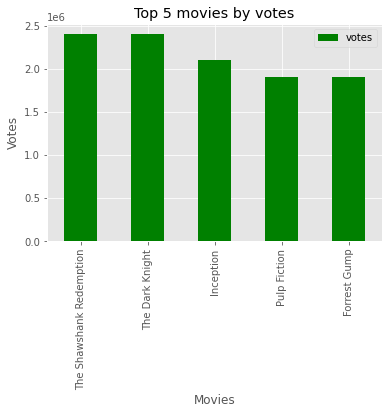

In [89]:
visual(movie_popularity.nlargest(5, 'votes').plot(x = 'name', y = 'votes', kind = 'bar', color = 'Green'))
plt.title('Top 5 movies by votes')
plt.xlabel('Movies')
plt.ylabel('Votes')
plt.show()

## Average yearly gross income 

Text(0, 0.5, 'Average income')

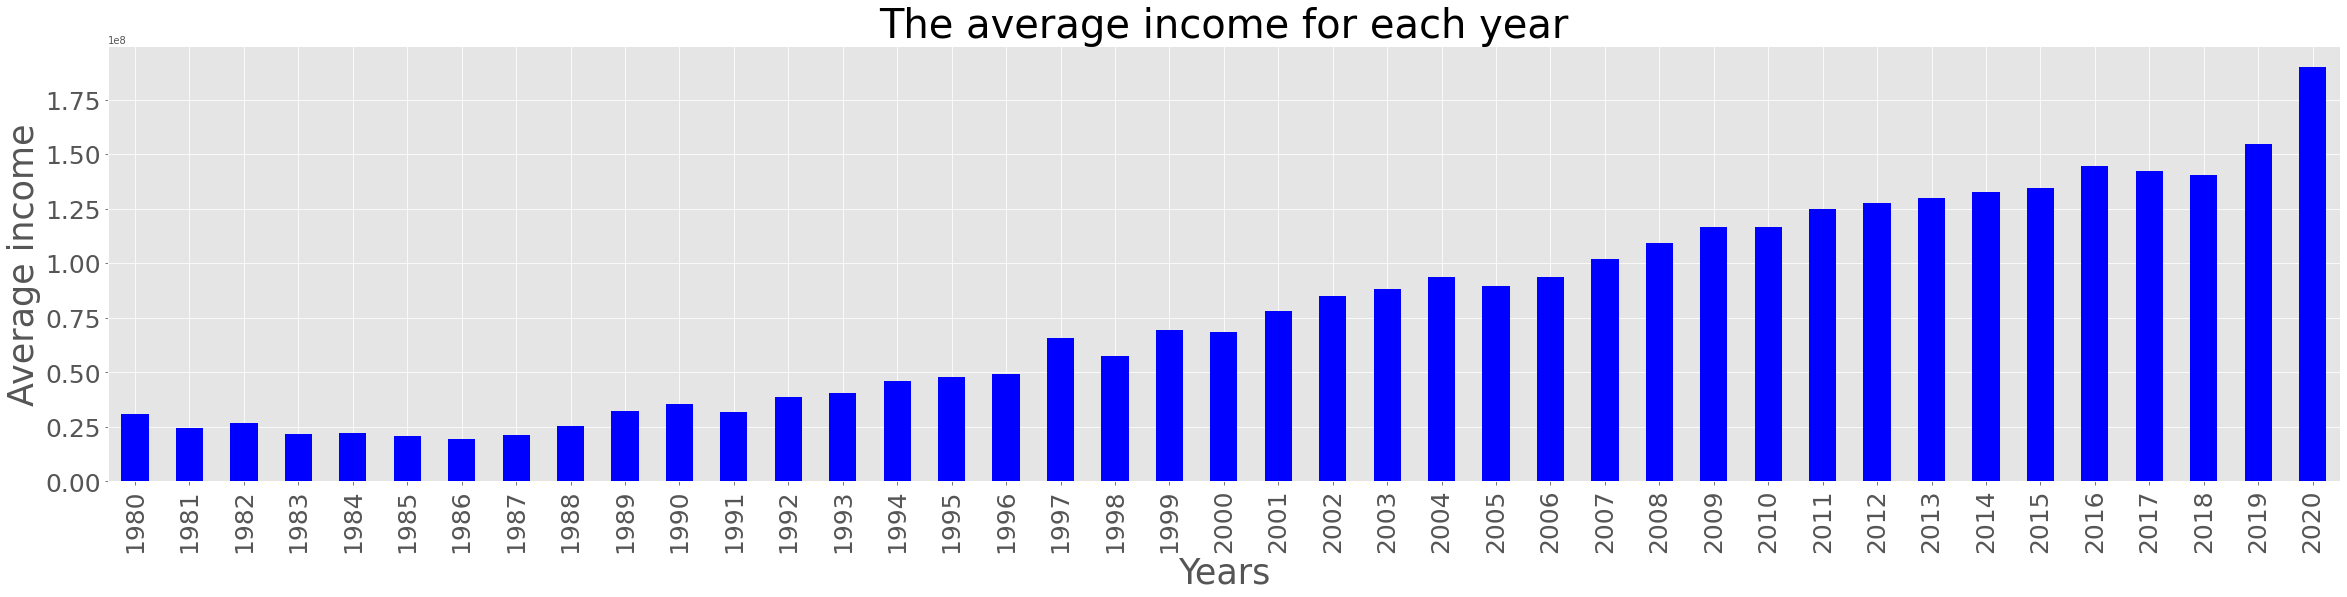

In [92]:
df.groupby('year')['gross'].mean().plot(kind='bar',figsize=(40,8),color='blue',fontsize=25)
plt.title('The average income for each year',fontsize=40)
plt.xlabel('Years',fontsize= 35)
plt.ylabel('Average income', fontsize= 35)